In [40]:
#imports
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import storage
from scipy.stats import zscore

In [31]:
import IPython
IPython.display.clear_output()

In [36]:
import os
import pandas as pd
from google.cloud import storage

# Set up GCP authentication
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/content/peppy-web-437616-r6-ec3f12e7c15e.json"

# Define GCP bucket and file path
BUCKET_NAME = "ycbs299"
FILE_PATH = "open-meteo-45.52N73.75W226m (1).csv"

# Download the file from GCP and read raw content
client = storage.Client()
bucket = client.bucket(BUCKET_NAME)
blob = bucket.blob(FILE_PATH)
raw_content = blob.download_as_text().split("\n")  # Read as lines

# Detect the actual header row by checking where "time," starts
header_row_index = next(i for i, line in enumerate(raw_content) if line.startswith("time,"))

# Read CSV while skipping metadata rows
df_weather = pd.read_csv(f"gs://{BUCKET_NAME}/{FILE_PATH}", skiprows=header_row_index)

# Display first few rows
df_weather.head()

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,2015-01-01,71.0,-3.1,-8.6,-6.7,-13.3,31589.78,0.9,0.0,0.70,33.2,67.7,225.0,3.82,0.91
1,2015-01-02,71.0,-4.3,-11.2,-7.6,-14.1,31643.49,0.2,0.0,0.21,23.0,51.1,266.0,7.12,0.87
2,2015-01-03,73.0,-11.1,-16.9,-13.8,-19.2,31702.32,1.0,0.0,0.70,16.0,35.3,30.0,4.32,0.50
3,2015-01-04,75.0,2.7,-11.5,-4.4,-9.1,31766.12,27.4,9.0,12.88,18.6,56.2,52.0,0.64,0.19
4,2015-01-05,3.0,3.4,-20.1,-11.4,-18.5,31834.74,0.0,0.0,0.00,27.1,58.0,267.0,6.91,0.42


In [37]:
df_weather.columns

Index(['time', 'weather_code (wmo code)', 'temperature_2m_max (°C)',
       'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
       'apparent_temperature_mean (°C)', 'daylight_duration (s)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'snowfall_sum (cm)',
       'wind_speed_10m_max (km/h)', 'wind_gusts_10m_max (km/h)',
       'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)',
       'et0_fao_evapotranspiration (mm)'],
      dtype='object')

In [39]:
df_weather.dtypes

,0
time,object
weather_code (wmo code),float64
temperature_2m_max (°C),float64
temperature_2m_min (°C),float64
temperature_2m_mean (°C),float64
apparent_temperature_mean (°C),float64
daylight_duration (s),float64
precipitation_sum (mm),float64
rain_sum (mm),float64
snowfall_sum (cm),float64


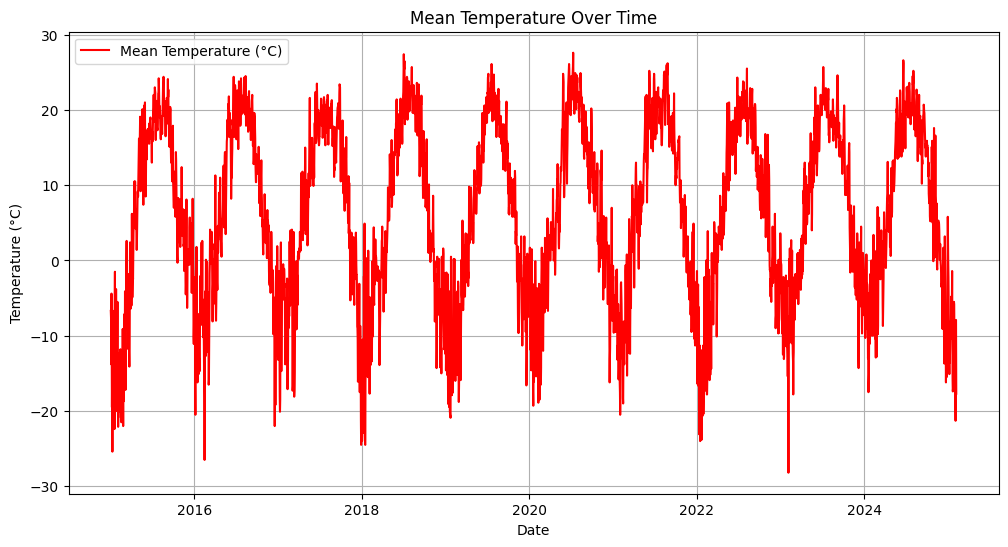

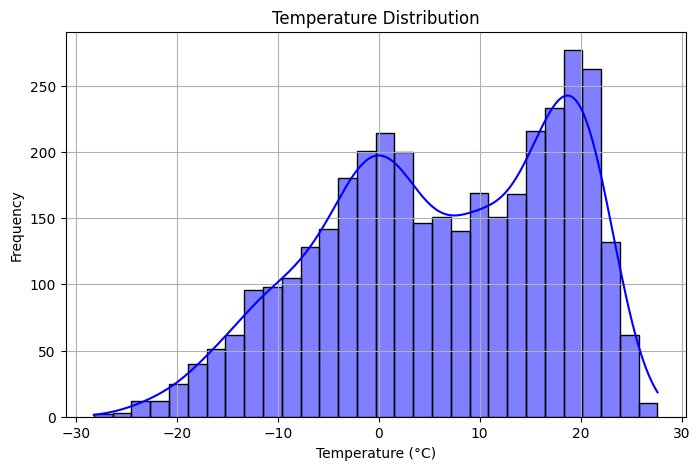

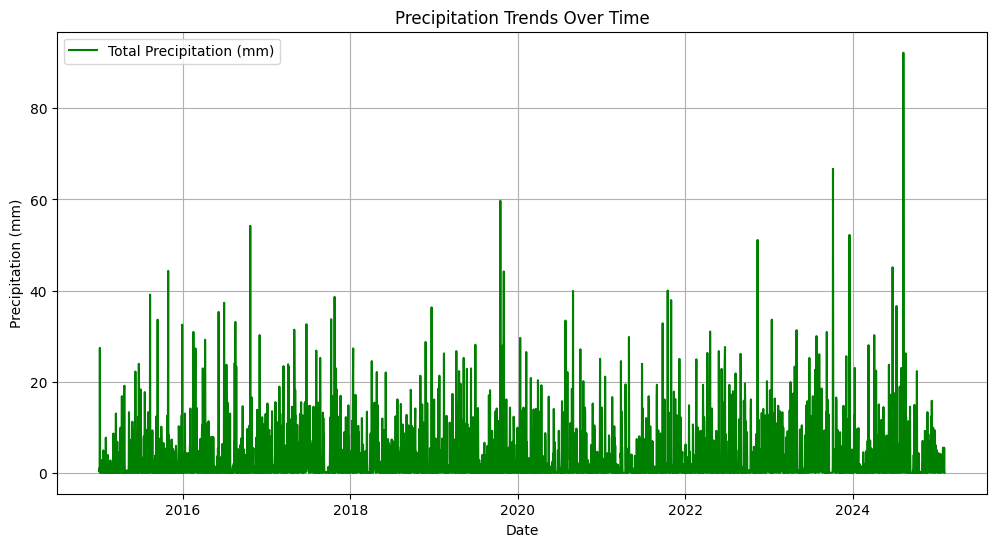

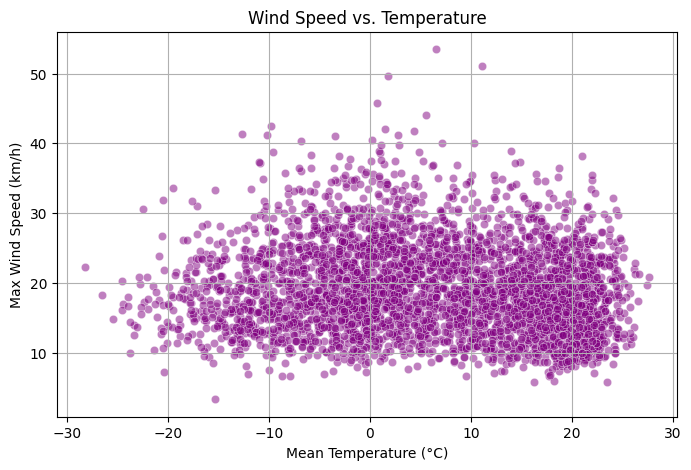

In [41]:
# Ensure the date column is in datetime format
df_weather["time"] = pd.to_datetime(df_weather["time"])

# --- 1️⃣ Mean Temperature Over Time ---
plt.figure(figsize=(12, 6))
plt.plot(df_weather["time"], df_weather["temperature_2m_mean (°C)"], label="Mean Temperature (°C)", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Mean Temperature Over Time")
plt.legend()
plt.grid()
plt.show()

# --- 2️⃣ Temperature Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(df_weather["temperature_2m_mean (°C)"], bins=30, kde=True, color="blue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")
plt.grid()
plt.show()

# --- 3️⃣ Precipitation Over Time ---
if "precipitation_sum (mm)" in df_weather.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df_weather["time"], df_weather["precipitation_sum (mm)"], label="Total Precipitation (mm)", color="green")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (mm)")
    plt.title("Precipitation Trends Over Time")
    plt.legend()
    plt.grid()
    plt.show()

# --- 4️⃣ Wind Speed vs. Temperature ---
if "wind_speed_10m_max (km/h)" in df_weather.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_weather["temperature_2m_mean (°C)"], y=df_weather["wind_speed_10m_max (km/h)"], alpha=0.5, color="purple")
    plt.xlabel("Mean Temperature (°C)")
    plt.ylabel("Max Wind Speed (km/h)")
    plt.title("Wind Speed vs. Temperature")
    plt.grid()
    plt.show()